# INTRODUCTION
## Hotel booking 
## EDA
The dataset contains data from two different hotels "Resort hotel and City hotel".
The data contains "bookings due to arrive between 2018 and 2020".
## Topics covered and questions to answer from the data:
1-What is the data Distribution?

2-What is the total bookings count per Hotel?

3-Where do the guests come from?

4-What is the Average Revenue per country?

5-Distribution of Number of Bookings in Seasons

6-Total Bookings vs Total Cancellations (Top 10 Countries)

7-Total Bookings vs Total Cancellations (Market Segment)?

8-Total Bookings vs Total Cancellations by Deposit Type?

9-Guest Type Distribution and ADR?

10-What are Repeated Guests percent by Deposit Type?

11-How many bookings were cancelled?

12-Which month have the highest number of cancellations?

13-Does the lead time affect the cancellation?

14-Does the difference between reserved room and assigned room affect the cancellation?

15-What is The total ADR for 'Not Canceled' and 'Canceled' bookings?

16-Could revenue increase if the hotel can reduce the cancellation rate?


# Import data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [62]:
df1 = pd.read_csv('sheet1.csv')
df2 = pd.read_csv('sheet2.csv')
df3 = pd.read_csv('sheet3.csv')
df4 = pd.read_csv('market_segment.csv')
df5 = pd.read_csv('meal_cost.csv')

In [63]:
df = pd.concat([df1,df2,df3])
df = pd.merge(df,df4,on='market_segment')
df = pd.merge(df,df5,on='meal')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,h,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_day_of_month,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1.0,0,3,2,...,0,Transient,82.0,0,1,Canceled,5/6/2018,NaN,0.3,12.99
1,Resort Hotel,1,23,2018,July,27,1.0,0,4,2,...,0,Transient,123.0,0,0,Canceled,6/23/2018,NaN,0.3,12.99
2,Resort Hotel,1,60,2018,July,27,1.0,2,5,2,...,0,Transient,107.0,0,2,Canceled,5/11/2018,NaN,0.3,12.99
3,Resort Hotel,1,45,2018,July,27,2.0,1,3,3,...,0,Transient,108.8,0,1,Canceled,5/19/2018,NaN,0.3,12.99
4,Resort Hotel,1,40,2018,July,27,2.0,1,3,3,...,0,Transient,108.8,0,1,Canceled,6/19/2018,NaN,0.3,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141942,Resort Hotel,0,14,2019,December,50,NaN,1,2,1,...,0,Transient-Party,0.0,0,0,Check-Out,12/8/2019,5.0,1.0,0.00
141943,Resort Hotel,0,5,2019,December,50,NaN,0,3,1,...,0,Transient-Party,0.0,0,0,Check-Out,12/11/2019,8.0,1.0,0.00
141944,Resort Hotel,0,1,2019,December,50,NaN,0,3,1,...,0,Transient-Party,0.0,0,0,Check-Out,12/11/2019,8.0,1.0,0.00
141945,Resort Hotel,1,62,2020,May,19,NaN,2,1,1,...,0,Transient,0.0,0,0,Canceled,5/4/2020,7.0,1.0,0.00


In [64]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
h                                 119951
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               8
babies                                 0
meal                                   0
country                              625
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              19555
company         

# Cleaning and processing

In [65]:
df = df.drop_duplicates()

In [66]:
df = df.drop(columns=['h','agent','company'])

In [67]:
most_frequent_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_frequent_country)

In [68]:
most_frequent_day_of_arrival = df['arrival_date_day_of_month'].mode()[0]
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].fillna(most_frequent_day_of_arrival)

In [69]:
df = df[df.adults!=0]

# Adding feature

In [70]:
df[df.is_canceled==1].assigned_room_type.unique()

array(['A', 'E', 'D', 'G', 'F', 'H', 'C', 'B', 'K', 'I', 'L'],
      dtype=object)

In [71]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [72]:
def seasons(row):
    if row['arrival_date_month'] in ['January', 'February', 'March']:
        return 'Spring'
    elif row['arrival_date_month'] in ['April', 'May', 'June']:
        return 'Summer'
    elif row['arrival_date_month'] in ['July', 'August', 'September']:
        return 'Fall'
    else:
        return 'Winter'
df['seasons'] = df.apply(seasons, axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_day_of_month,Discount,Cost,seasons
0,Resort Hotel,1,85,2018,July,27,0,3,2,0.0,...,Transient,82.0,0,1,Canceled,5/6/2018,28.0,0.3,12.99,Fall
1,Resort Hotel,1,23,2018,July,27,0,4,2,0.0,...,Transient,123.0,0,0,Canceled,6/23/2018,28.0,0.3,12.99,Fall
2,Resort Hotel,1,60,2018,July,27,2,5,2,0.0,...,Transient,107.0,0,2,Canceled,5/11/2018,28.0,0.3,12.99,Fall
3,Resort Hotel,1,45,2018,July,27,1,3,3,0.0,...,Transient,108.8,0,1,Canceled,5/19/2018,28.0,0.3,12.99,Fall
4,Resort Hotel,1,40,2018,July,27,1,3,3,0.0,...,Transient,108.8,0,1,Canceled,6/19/2018,28.0,0.3,12.99,Fall


In [73]:
def guest_type(row):
    if row['adults'] == 1 and row['children'] == 0 and row['babies'] == 0:
        return 'Single'
    elif row['adults'] == 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Couple'
    elif row['adults'] > 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Group'
    else:
        return 'Family'

df['guest_type'] = df.apply(guest_type, axis=1)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_day_of_month,Discount,Cost,seasons,guest_type
0,Resort Hotel,1,85,2018,July,27,0,3,2,0.0,...,82.0,0,1,Canceled,5/6/2018,28.0,0.3,12.99,Fall,Couple
1,Resort Hotel,1,23,2018,July,27,0,4,2,0.0,...,123.0,0,0,Canceled,6/23/2018,28.0,0.3,12.99,Fall,Couple
2,Resort Hotel,1,60,2018,July,27,2,5,2,0.0,...,107.0,0,2,Canceled,5/11/2018,28.0,0.3,12.99,Fall,Couple
3,Resort Hotel,1,45,2018,July,27,1,3,3,0.0,...,108.8,0,1,Canceled,5/19/2018,28.0,0.3,12.99,Fall,Group
4,Resort Hotel,1,40,2018,July,27,1,3,3,0.0,...,108.8,0,1,Canceled,6/19/2018,28.0,0.3,12.99,Fall,Group


In [74]:
df.columns.unique()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_day_of_month', 'Discount', 'Cost', 'seasons',
       'guest_type'],
      dtype='object')

In [75]:
df = df.rename(columns={'Discount':'discount','Cost':'cost'})

# Overal descriptive statistics

In [76]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,100327.0,0.265861,0.441793,0.00,0.00,0.00,1.00,1.0
lead_time,100327.0,77.067430,84.670567,0.00,10.00,46.00,119.00,737.0
arrival_date_year,100327.0,2019.182453,0.643182,2018.00,2019.00,2019.00,2020.00,2020.0
arrival_date_week_number,100327.0,28.555822,13.724538,1.00,18.00,30.00,39.00,53.0
stays_in_weekend_nights,100327.0,1.009070,1.032136,0.00,0.00,1.00,2.00,19.0
stays_in_week_nights,100327.0,2.641153,2.056759,0.00,1.00,2.00,4.00,50.0
adults,100327.0,1.878178,0.687727,1.00,2.00,2.00,2.00,55.0
children,100319.0,0.129497,0.440918,0.00,0.00,0.00,0.00,10.0
babies,100327.0,0.011592,0.118866,0.00,0.00,0.00,0.00,10.0
is_repeated_guest,100327.0,0.037089,0.188980,0.00,0.00,0.00,0.00,1.0


<Figure size 1000x600 with 0 Axes>

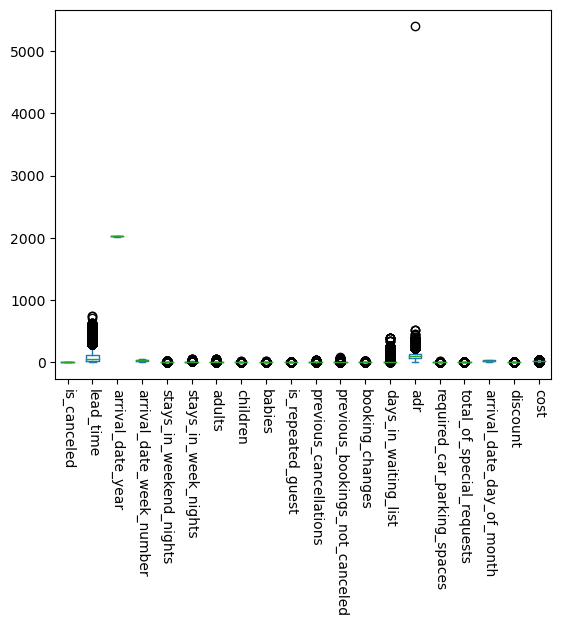

In [77]:
plt.figure(figsize=(10,6))
df.plot(kind='box')
plt.xticks(rotation=270)
plt.show()

In [78]:
df=df[~(df['adr']>1000)]

In [79]:
df.shape

(100326, 34)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10456\240712287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


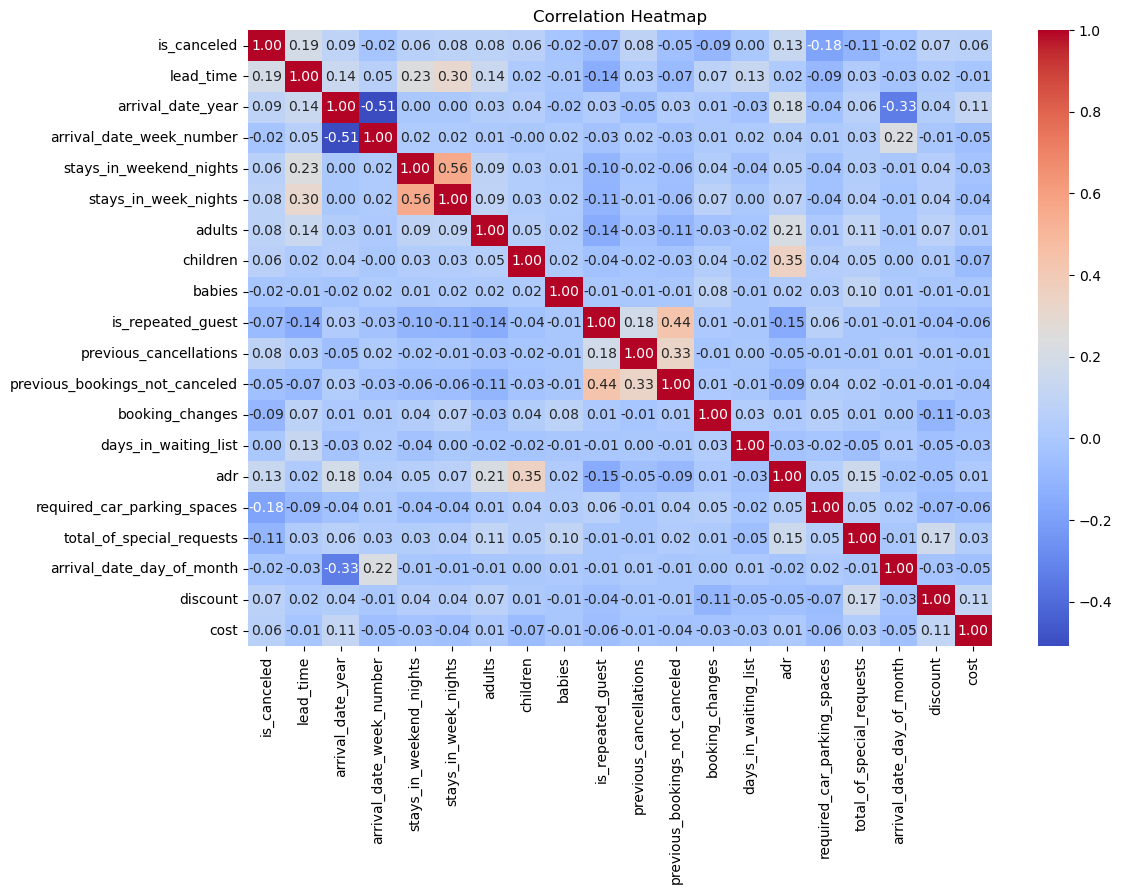

In [80]:
corr_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data visualization

<Axes: xlabel='adr', ylabel='Count'>

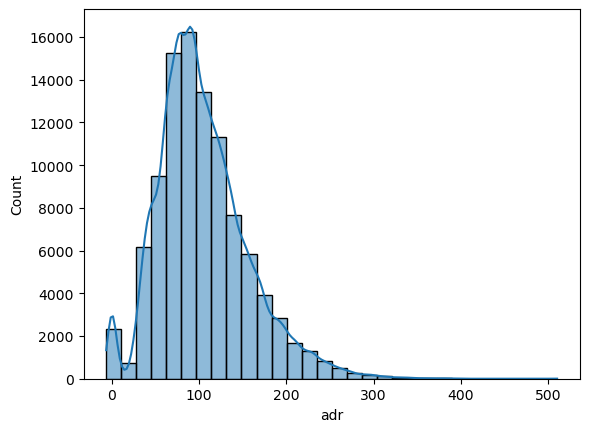

In [81]:
sns.histplot(df['adr'], kde=True, bins=30)

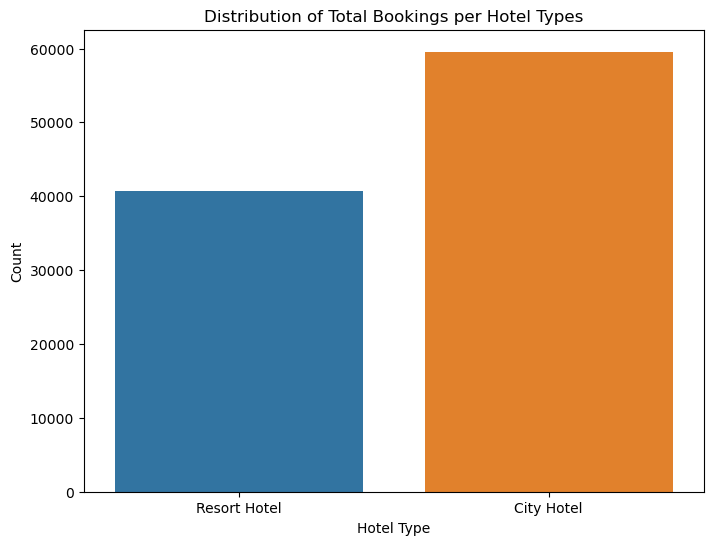

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Total Bookings per Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

There are approximately 60 thousands bookings for City Hotel and over 40 thousands bookings for Resort hotel

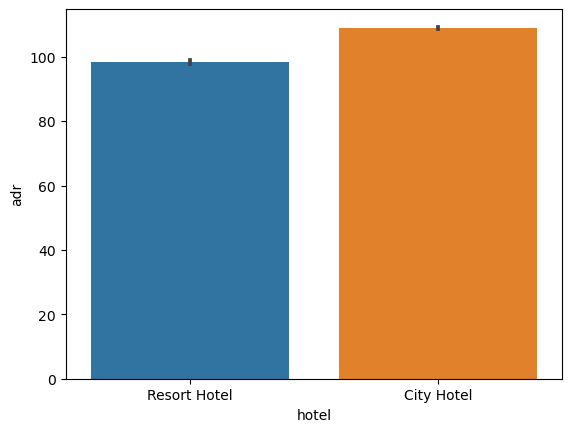

<Figure size 800x600 with 0 Axes>

In [83]:
adr = df.groupby(['hotel'], as_index = False).adr.mean()
sns.barplot(data=df, x='hotel', y= 'adr')
plt.figure(figsize=(8,6))
plt.show()

<Axes: xlabel='hotel', ylabel='adr'>

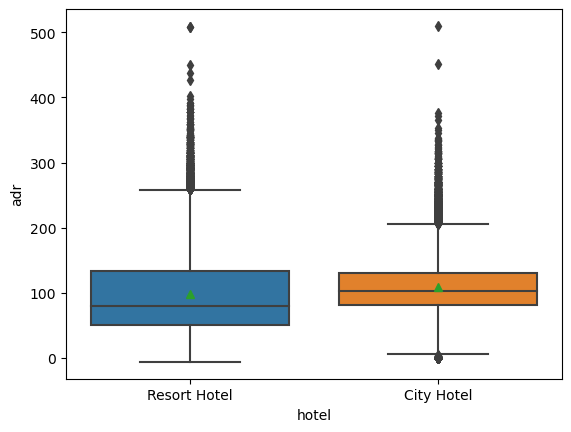

In [84]:
sns.boxplot(data=df, x='hotel', y='adr', showmeans=True)

And also, City hotel has the higher mean adr compared to Resort hotel

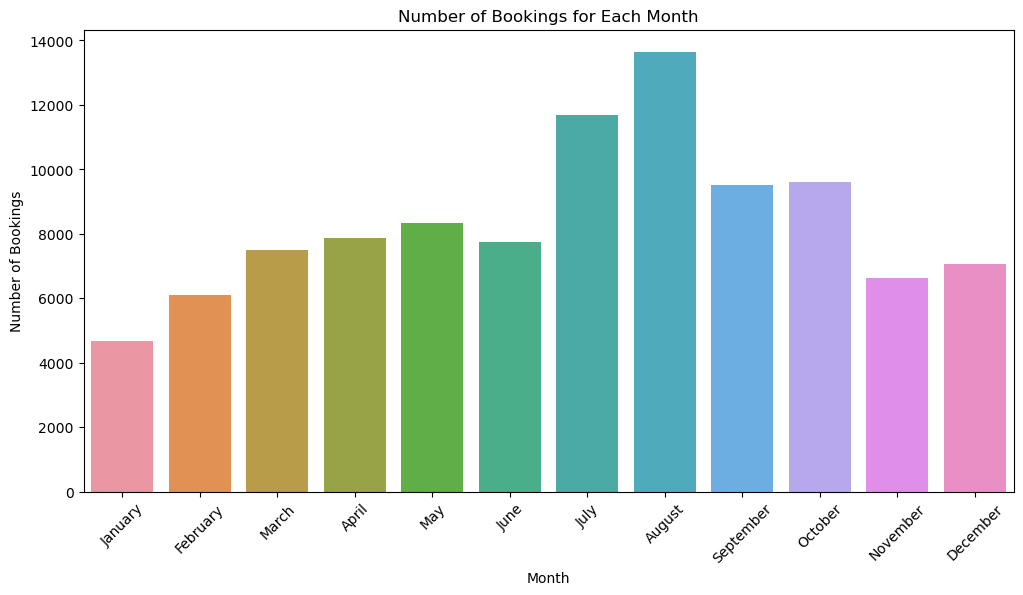

In [86]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
sns.countplot(x='arrival_date_month', data=df, order=months_order)
plt.title('Number of Bookings for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

The number of bookings varies across the months, with August being the month with the most bookings and January being the month with the least bookings.

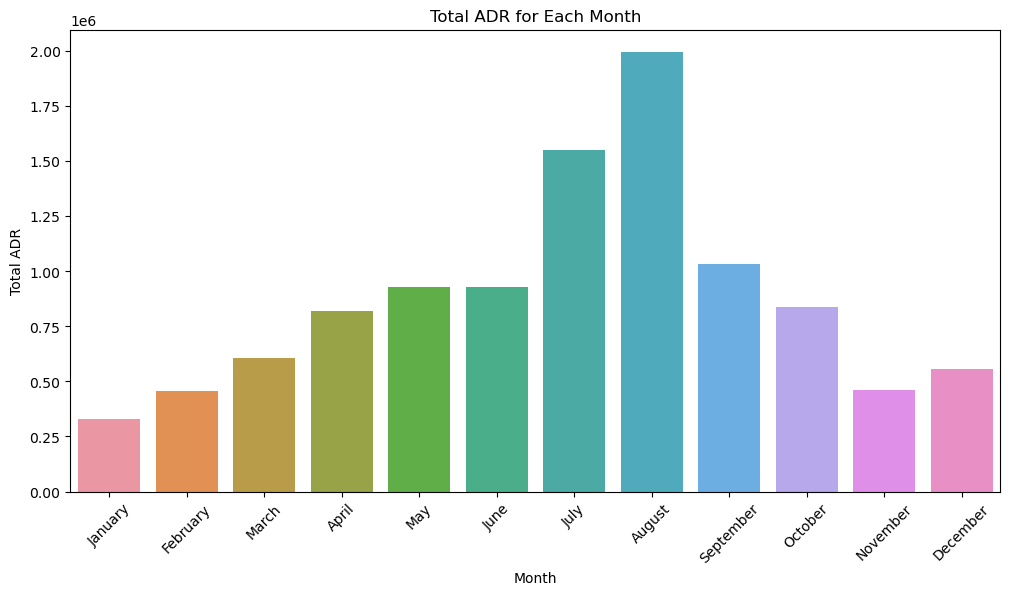

In [87]:
total_adr_month = df.groupby('arrival_date_month')['adr'].sum().reindex(months_order)

plt.figure(figsize=(12,6))
sns.barplot(x=total_adr_month.index, y=total_adr_month.values)
plt.title('Total ADR for Each Month')
plt.xlabel('Month')
plt.ylabel('Total ADR')
plt.xticks(rotation=45)
plt.show()

The total ADR is highest in August and lowest in January, which aligns with the number of bookings for each month.

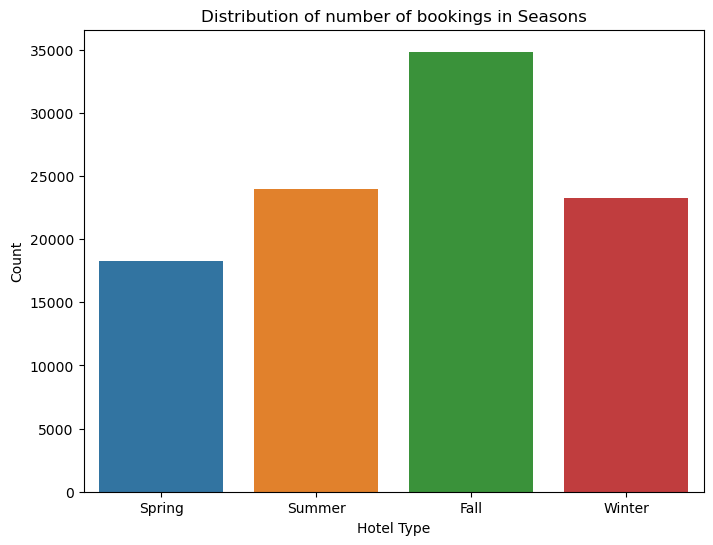

In [115]:
custom_order = ['Spring','Summer',"Fall",'Winter']
plt.figure(figsize=(8,6))
sns.countplot(x='seasons', order=custom_order, data=df)
plt.title('Distribution of number of bookings in Seasons')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

Most bookings are made in Fall, followed by Summer, Winter, and Spring.

<Figure size 1000x800 with 0 Axes>

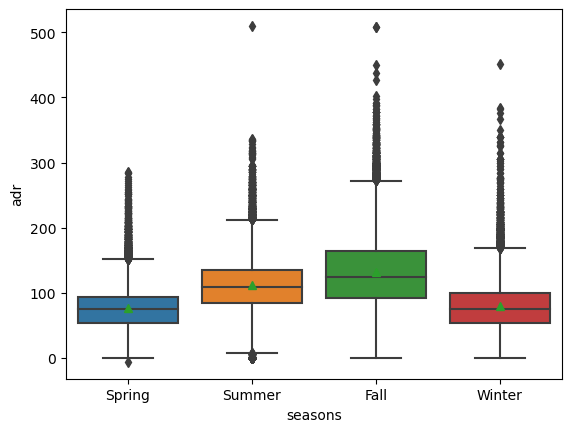

<Figure size 1000x800 with 0 Axes>

In [116]:
sns.boxplot(data=df, x='seasons', y='adr',order=custom_order, showmeans=True)
plt.figure(figsize=(10,8))

The median ADR is highest in Fall and lowest in Spring, reflecting seasonal demand.

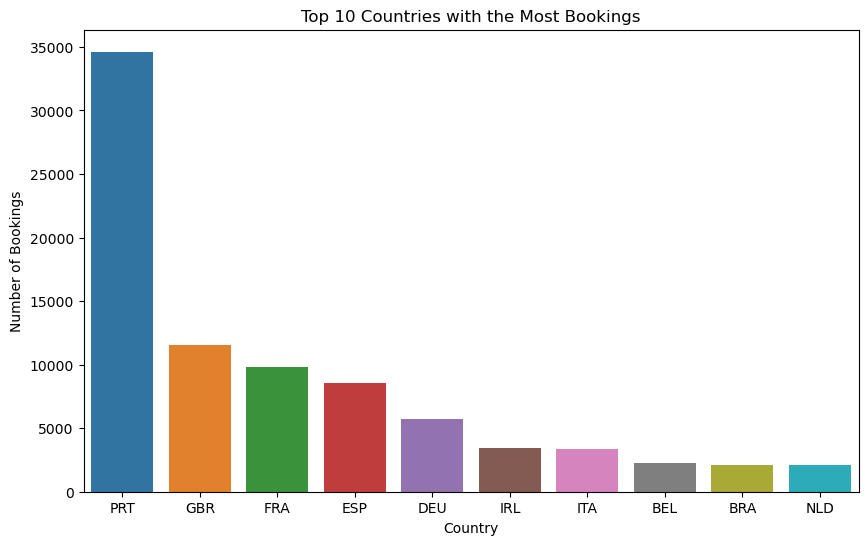

In [118]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index,y=top_countries.values)
plt.title('Top 10 Countries with the Most Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

The majority of bookings are from guests in Portugal (PRT), followed by Great Britain (GBR), France (FRA), Spain (ESP), and Germany (DEU). The other countries in the top 10 are Ireland (IRL), Italy (ITA), Belgium (BEL), Brazil (BRA), and the Netherlands (NLD).

<Figure size 1000x600 with 0 Axes>

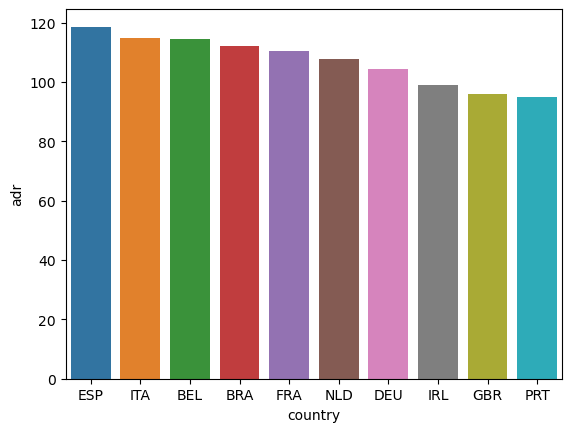

<Figure size 1000x600 with 0 Axes>

In [91]:
top_countries = df.country.value_counts().index[:10]
top10adr=df[df['country'].isin(top_countries)].groupby(['country'], as_index=False)['adr'].mean().sort_values(by='adr',ascending=False)
sns.barplot(data=top10adr,x='country',y='adr')
plt.figure(figsize=(10,6))

Guests from Portugal (PRT), which has the highest number of bookings, have a lower average ADR compared to some other countries.

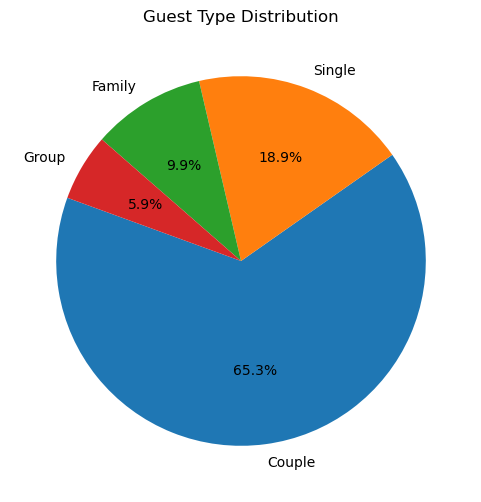

In [92]:
guest_type_counts = df['guest_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(guest_type_counts, labels=guest_type_counts.index,autopct='%1.1f%%', startangle=160)
plt.title('Guest Type Distribution')
plt.show()

Most of the guests are Couple, followed by Single, Family, and Group.

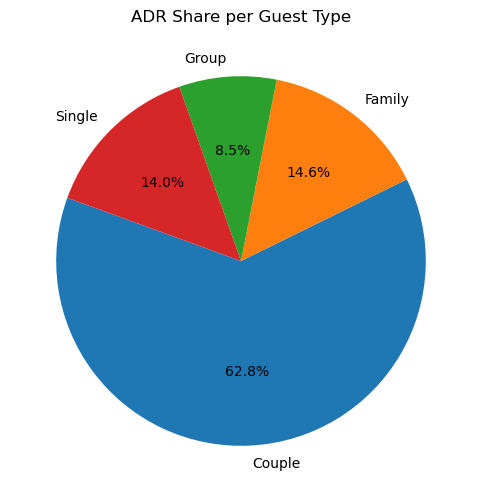

In [93]:
total_adr_per_category = df.groupby('guest_type')['adr'].sum()

plt.figure(figsize=(6, 6))
plt.pie(total_adr_per_category, labels=total_adr_per_category.index, autopct='%1.1f%%', startangle=160)
plt.title('ADR Share per Guest Type')
plt.show()

Couple guests contribute the most to the total ADR, followed by Single, Family, and Group.

<Axes: xlabel='guest_type', ylabel='adr'>

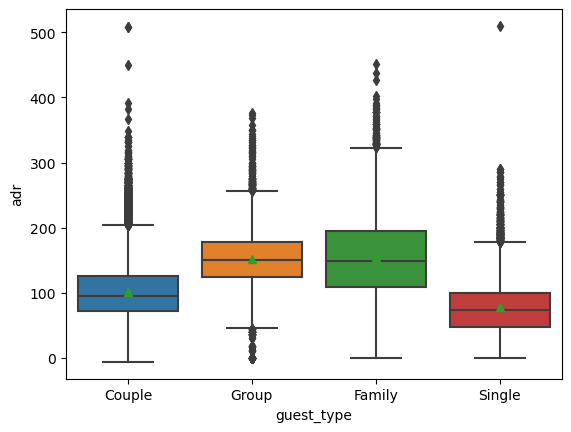

In [94]:
sns.boxplot(data=df, x='guest_type', y='adr', showmeans=True)


In [95]:
preferred_month = df.groupby('guest_type')['arrival_date_month'].agg(pd.Series.mode)
preferred_season = df.groupby('guest_type')['seasons'].agg(pd.Series.mode)

preferred_month, preferred_season

(guest_type
 Couple     August
 Family     August
 Group      August
 Single    October
 Name: arrival_date_month, dtype: object,
 guest_type
 Couple      Fall
 Family      Fall
 Group       Fall
 Single    Winter
 Name: seasons, dtype: object)

The most guests preferred month for all guest types is August, and the most preferred season is Fall.

# Cancellation analysis

In [96]:
print('-'*30)
print('Total Bookings canceled')
print('-'*30)
print(df.is_canceled.value_counts())
print('-'*30)
print('Cancelation percent in hotels')
print('-'*30)
print(df.is_canceled.value_counts(normalize=True))

------------------------------
Total Bookings canceled
------------------------------
0    73654
1    26672
Name: is_canceled, dtype: int64
------------------------------
Cancelation percent in hotels
------------------------------
0    0.734147
1    0.265853
Name: is_canceled, dtype: float64


The majority of bookings were not canceled.

Approximately 27% of bookings were canceled.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10456\446519047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_bookings'] = 1


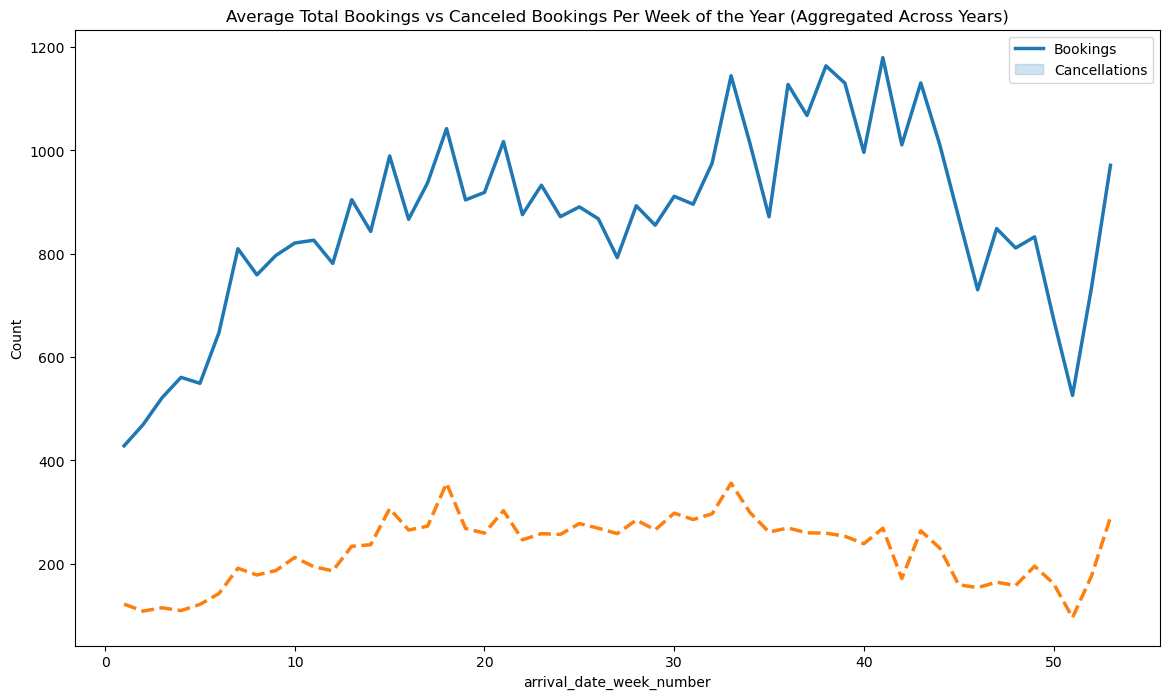

In [97]:
# Create a new column for total bookings
df['total_bookings'] = 1

# Create the weekly dataframe
df_weekly = df.groupby(['arrival_date_year', 'arrival_date_week_number'],as_index=False).agg({'is_canceled': 'sum', 'total_bookings': 'count'})

# Create the monthly dataframe
df_monthly = df.groupby(['arrival_date_year', 'arrival_date_month'],as_index=False).agg({'is_canceled': 'sum', 'total_bookings': 'count'})

# Aggregate the data across all years
df_weekly_agg = df_weekly.groupby(['arrival_date_week_number'],as_index=False).agg({'is_canceled': 'mean', 'total_bookings': 'mean'})
df_monthly_agg = df_monthly.groupby(['arrival_date_month'],as_index=False).agg({'is_canceled': 'mean', 'total_bookings': 'mean'})

# Plot the weekly trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='arrival_date_week_number', y='total_bookings', data=df_weekly_agg, linewidth=2.5)
sns.lineplot(x='arrival_date_week_number', y='is_canceled', data=df_weekly_agg, linewidth=2.5, linestyle='--')
plt.title('Average Total Bookings vs Canceled Bookings Per Week of the Year (Aggregated Across Years)')
plt.ylabel('Count')
plt.legend(['Bookings', 'Cancellations'])
plt.show()

The average number of bookings and cancellations both fluctuate over the weeks. However, the proportion of cancellations seems to remain relatively constant across different weeks of the year.

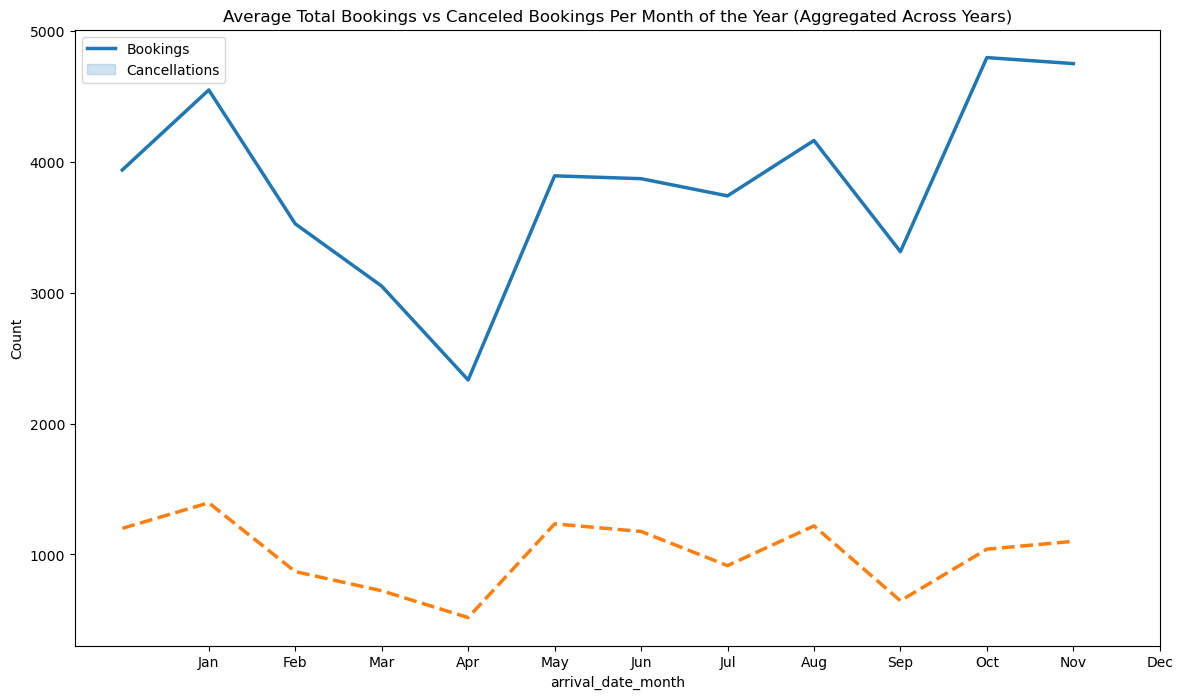

In [98]:
# Plot the monthly trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='arrival_date_month', y='total_bookings', data=df_monthly_agg, linewidth=2.5)
sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_monthly_agg, linewidth=2.5, linestyle='--')
plt.title('Average Total Bookings vs Canceled Bookings Per Month of the Year (Aggregated Across Years)')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Bookings', 'Cancellations'])
plt.show()

Similar to the weekly trends, the total bookings and cancellations fluctuate over the months.

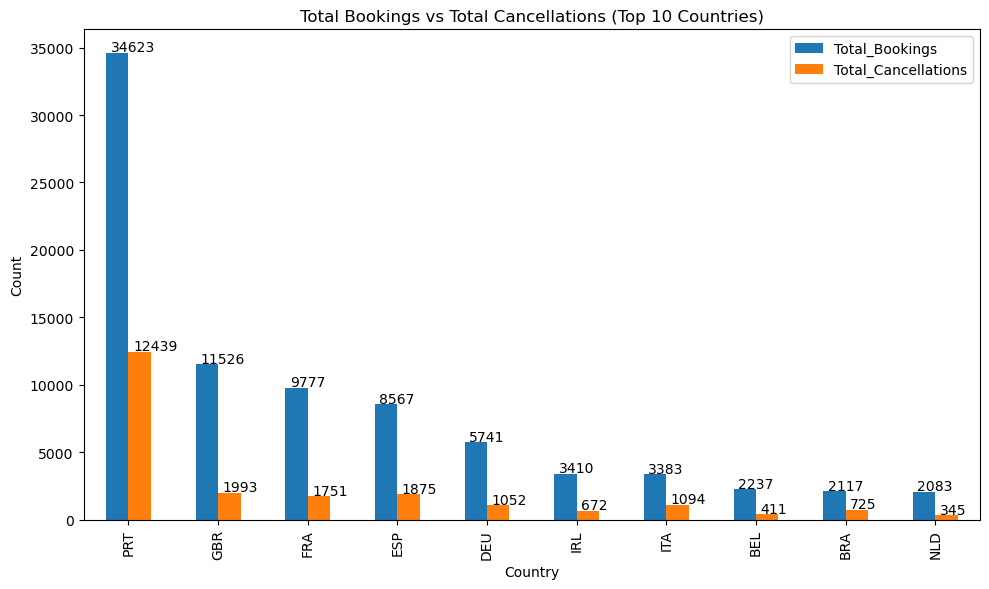

In [99]:
# Calculate the number and proportion of cancellations for each country
country_cancellations = df[df['is_canceled'] == 1]['country'].value_counts()
country_cancellations_proportion = df[df['is_canceled'] == 1]['country'].value_counts(normalize=True)

# Calculate the total number of bookings for each country
country_bookings = df['country'].value_counts()

# Select the top 10 countries in terms of total bookings
top_countries_bookings = country_bookings[:10]
top_countries_cancellations = country_cancellations[top_countries_bookings.index]
# Create a new DataFrame for plotting
top_countries_df = pd.DataFrame({
    'Total_Bookings': top_countries_bookings,
    'Total_Cancellations': top_countries_cancellations
})

# Plot the total number of bookings vs total cancellations
ax = top_countries_df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Total Bookings vs Total Cancellations (Top 10 Countries)')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# Add values on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + 0.05, i.get_height() + 100, str(i.get_height()), fontsize=10)

plt.tight_layout()
plt.show()

The top 10 countries with the highest number of bookings also have a significant number of cancellations. Portugal (PRT) has the highest number of bookings and cancellations, indicating a high demand from this country but also a high likelihood of cancellation.

In [100]:
# Select the top 10 countries in terms of total bookings
top_countries = country_bookings[:10].index

# Filter the data for the top 10 countries
top_countries_data = df[df['country'].isin(top_countries)]

# Calculate the total number of bookings and cancellations for the top 10 countries
total_bookings_top_countries = top_countries_data['country'].value_counts()
total_cancellations_top_countries = top_countries_data[top_countries_data['is_canceled'] == 1]['country'].value_counts()

# Calculate the percentage of bookings and cancellations for the top 10 countries
booking_percent_top_countries = total_bookings_top_countries / total_bookings_top_countries.sum()
cancellation_percent_top_countries = total_cancellations_top_countries / total_cancellations_top_countries.sum()
# Print the results
print('Booking Percent for Top 10 Countries')
print(booking_percent_top_countries)
print('-'*30)
print('Total Cancellations for Top 10 Countries')
print('-'*30)
print(cancellation_percent_top_countries)
print('-'*30)

Booking Percent for Top 10 Countries
PRT    0.414826
GBR    0.138095
FRA    0.117140
ESP    0.102643
DEU    0.068784
IRL    0.040856
ITA    0.040532
BEL    0.026802
BRA    0.025364
NLD    0.024957
Name: country, dtype: float64
------------------------------
Total Cancellations for Top 10 Countries
------------------------------
PRT    0.556381
GBR    0.089144
ESP    0.083866
FRA    0.078320
ITA    0.048933
DEU    0.047055
BRA    0.032428
IRL    0.030058
BEL    0.018384
NLD    0.015431
Name: country, dtype: float64
------------------------------


'PRT' (Portugal) has a relatively higher proportion of cancellations compared to other countries.
Portugal (PRT) makes up 41.4% of the total bookings and 55.6% of the total cancellations among these countries.

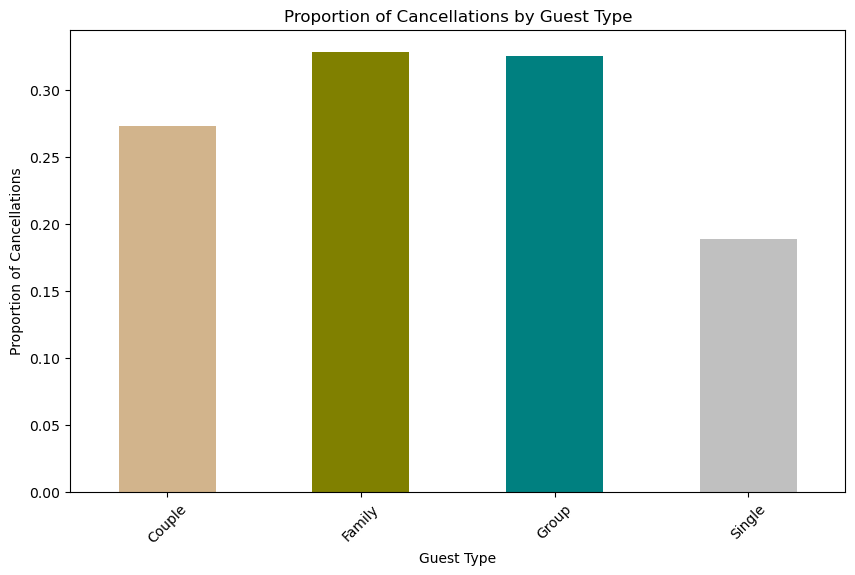

In [101]:
# Calculate the proportion of bookings that were cancelled for each guest type
guest_cancellations = df.groupby('guest_type')['is_canceled'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
colors = ['Tan', 'Olive', 'Teal', 'Silver', 'purple']
guest_cancellations.plot(kind='bar', color=colors)
plt.title('Proportion of Cancellations by Guest Type')
plt.xlabel('Guest Type')
plt.ylabel('Proportion of Cancellations')
plt.xticks(rotation=45)
plt.show()

Families have the highest cancellation rate, followed by groups, couples and single guests.

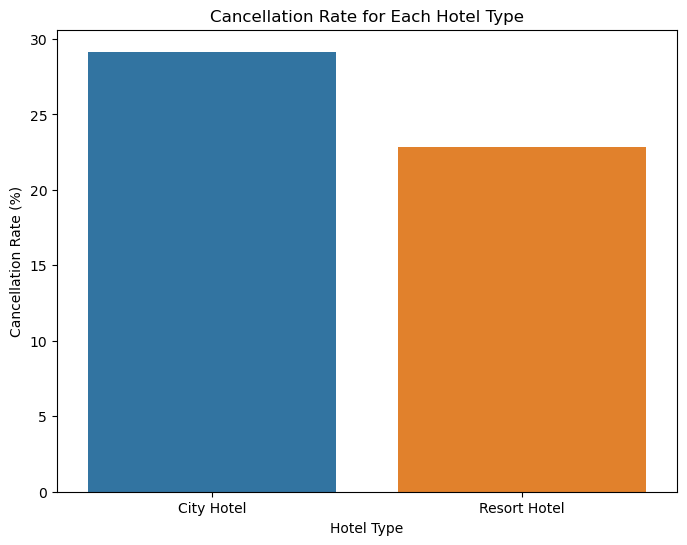

In [102]:
# Calculate cancellation rate for each hotel type
cancellation_rates = df.groupby('hotel')['is_canceled'].mean()

# Convert to percentage and plot
cancellation_rates = cancellation_rates * 100

# Plot cancellation rates
plt.figure(figsize=(8,6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.title('Cancellation Rate for Each Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

City hotels have a higher cancellation rate than resort hotels.

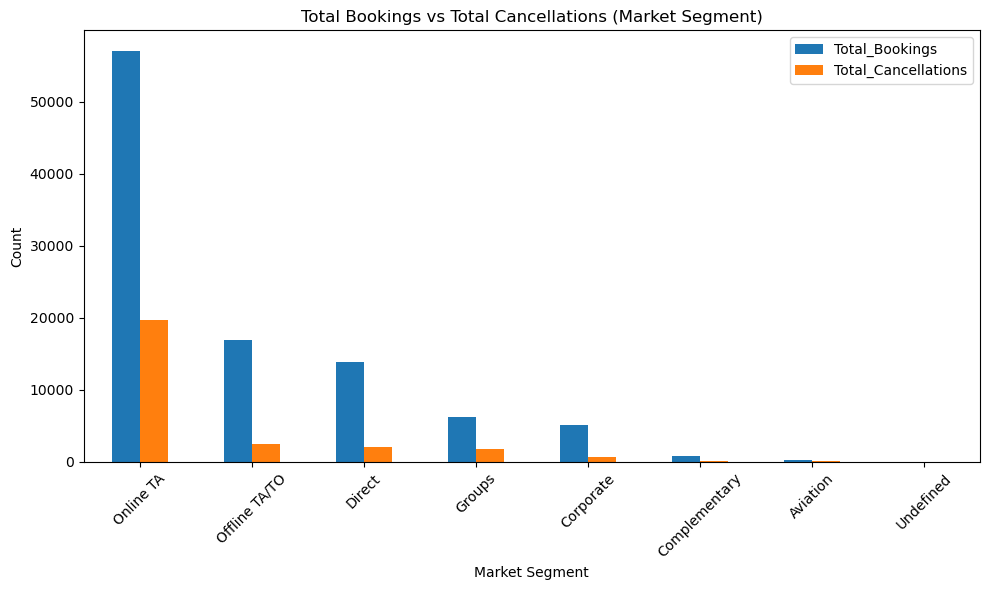

In [103]:
# Calculate the total number of bookings and cancellations for each market segment
market_segment_bookings = df['market_segment'].value_counts()
market_segment_cancellations = df[df['is_canceled'] == 1]['market_segment'].value_counts()

# Create a new DataFrame for plotting
market_segment_df = pd.DataFrame({
    'Total_Bookings': market_segment_bookings,
    'Total_Cancellations': market_segment_cancellations
}).sort_values(by='Total_Bookings', ascending=False)

# Plot the total number of bookings vs total cancellations
ax = market_segment_df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Total Bookings vs Total Cancellations (Market Segment)')
ax.set_xlabel('Market Segment')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The 'Online TA' market segment has the highest number of bookings and cancellations, followed by 'Offline TA/TO', 'Direct' and 'Groups'. The 'Complementary', 'Aviation', and 'Undefined' segments have the least number of bookings and cancellations.

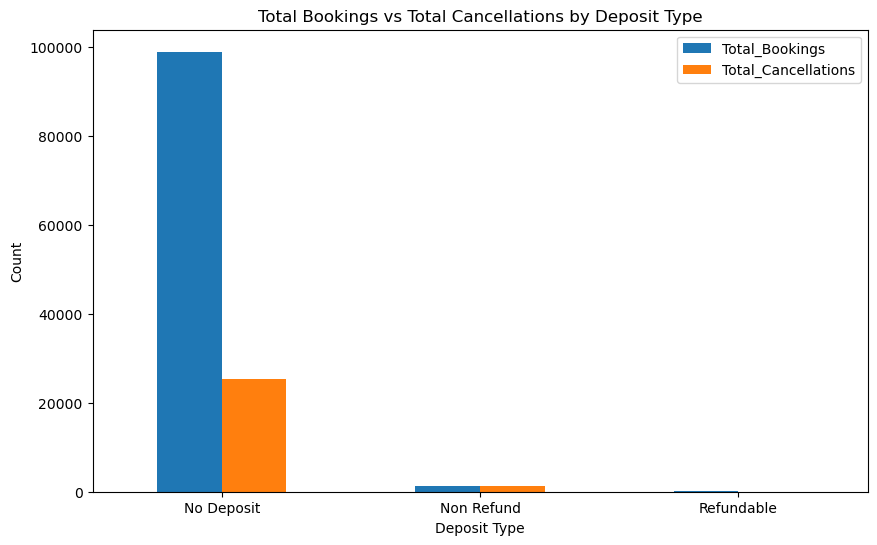

,Total_Bookings,Total_Cancellations,Cancellation_Percent
No Deposit,98932,25424,25.698460
Non Refund,1283,1222,95.245518
Refundable,111,26,23.423423


In [104]:
# Calculate total bookings for each deposit type
deposit_total_bookings = df['deposit_type'].value_counts()

# Calculate total cancellations for each deposit type
deposit_total_cancellations = df[df['is_canceled'] == 1]['deposit_type'].value_counts()

# Combine total bookings and total cancellations into one dataframe
deposit_data = pd.DataFrame({'Total_Bookings': deposit_total_bookings, 
                             'Total_Cancellations': deposit_total_cancellations})

# Calculate cancellation percent for each deposit type
deposit_data['Cancellation_Percent'] = (deposit_data['Total_Cancellations'] / deposit_data['Total_Bookings']) * 100

# Plot total bookings and total cancellations for each deposit type in one chart
deposit_data[['Total_Bookings', 'Total_Cancellations']].plot(kind='bar', figsize=(10, 6))
plt.title('Total Bookings vs Total Cancellations by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

deposit_data

The 'No Deposit' type has the highest number of bookings and cancellations, but the cancellation percentage is lower compared to the 'Non Refund' type, which has a cancellation rate of almost 100%. 'Refundable' deposits have the lowest number of bookings and cancellations, but their cancellation rate is similar to 'No Deposit'.

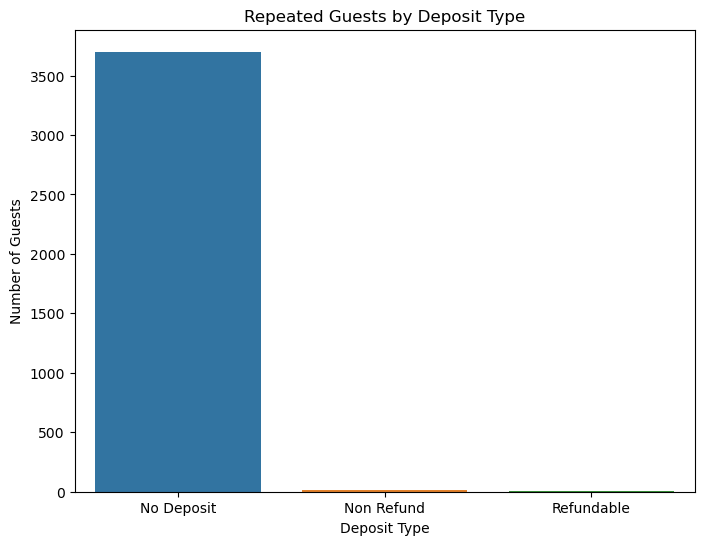

,Total_Bookings,Total_Cancellations,Cancellation_Percent,Total_Repeated_Guests,Repeated_Guest_Percent
No Deposit,98932,25424,25.698460,3700,3.739943
Non Refund,1283,1222,95.245518,17,1.325019
Refundable,111,26,23.423423,4,3.603604


In [105]:
# Filter data for repeated guests
repeated_guests_data = df[df['is_repeated_guest'] == 1]

# Count the number of repeated guests for each deposit type
repeated_guests_by_deposit = repeated_guests_data['deposit_type'].value_counts()


# Calculate repeated guest percent for each deposit type
deposit_data['Total_Repeated_Guests'] = repeated_guests_by_deposit
deposit_data['Repeated_Guest_Percent'] = (deposit_data['Total_Repeated_Guests'] / deposit_data['Total_Bookings']) * 100

# Plot the number of repeated guests for each deposit type
plt.figure(figsize=(8, 6))
sns.barplot(x=repeated_guests_by_deposit.index, y=repeated_guests_by_deposit.values)
plt.title('Repeated Guests by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Guests')
plt.show()

deposit_data

The 'No Deposit' type also has the highest number of repeated guests, followed by 'Non Refund' and 'Refundable'. The percentage of repeated guests is highest for 'No Deposit', followed by 'Refundable' and 'Non Refund'.

# Advanced Analysis: Control Chart, Cancellation Rate by Matching Requirement, Lead Time, Hypothesis Test and Revenue simulation.

### Lead time

C:\Users\DELL\AppData\Local\Temp\ipykernel_10456\3669298660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lead_time_category'] = pd.cut(df['lead_time'], bins)


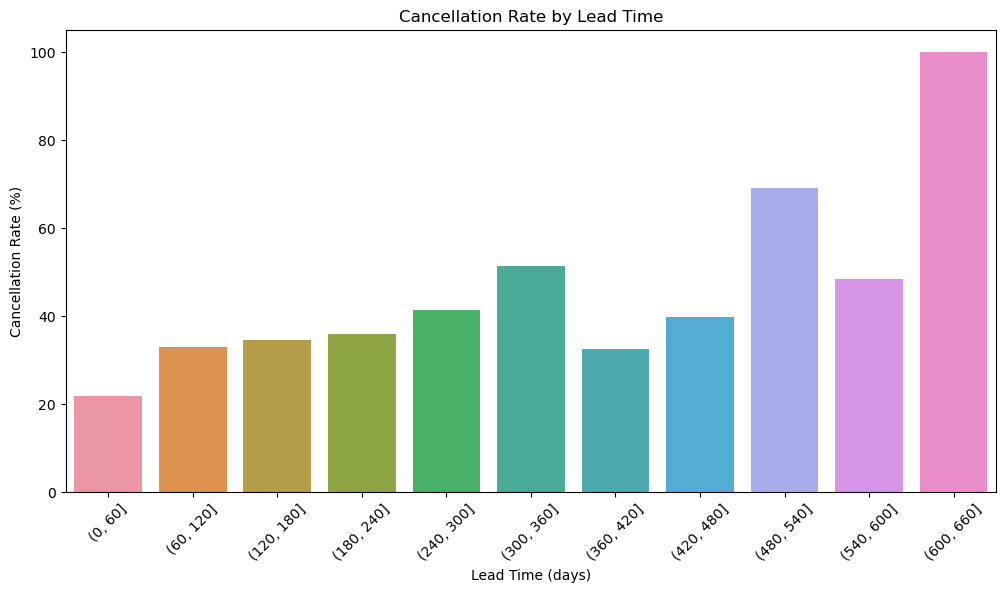

In [106]:
# Define bins for lead time
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660]

# Add a new column for lead time category
df['lead_time_category'] = pd.cut(df['lead_time'], bins)

# Calculate overall cancellation rate for each lead time category
cancellation_rates = df.groupby('lead_time_category')['is_canceled'].mean() * 100

# Plot cancellation rates
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

Previous graph suggests that there is a positive relationship between lead time and cancellation. the longer the time between booking and actual stay, the more likely the booking is to be cancelled.

We will run a Hypothesis test to find if there is an association between 'lead time' and 'cancellation'. In other words, the cancellation of a booking depends on the lead time.

H0: The 'lead_time_category' and 'is_canceled' are independent.

H1: The 'lead_time_category' and 'is_canceled' are not independent.

In [107]:
# Create a contingency table
contingency_table = pd.crosstab(df['lead_time'], df['is_canceled'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p

(7530.726676200357, 0.0)

The Chi-square test statistic is approximately 18123.22 and the p-value is 0.0.

A larger Chi-Square statistic indicates a greater difference between the observed and expected frequencies, and thus a stronger relationship between the variables.

In hypothesis testing, if the p-value is less than or equal to the significance level (usually 0.05), we reject the null hypothesis. In this case, the p-value is less than 0.05, so we reject the null hypothesis (H0: The lead time does not affect the cancellation rate).

Therefore, we have statistical evidence to support the alternative hypothesis (H1: The lead time affects the cancellation rate). 

This result is consistent with our earlier observation from the bar chart, indicating that the cancellation rate increases with lead time.

### difference between asigned room and reserved room

In [108]:
df['match_requirement'] = np.where(df.reserved_room_type != df.assigned_room_type, 0, 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10456\2153385697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_requirement'] = np.where(df.reserved_room_type != df.assigned_room_type, 0, 1)


In [109]:
contingency_table = pd.crosstab(df['match_requirement'], df['is_canceled'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected

(4704.5276545064935,
 0.0,
 1,
 array([[11712.57616171,  4241.42383829],
        [61941.42383829, 22430.57616171]]))

==> As the result, we can see that the difference between assigned room type and reserved room type could affect the cancellation rate

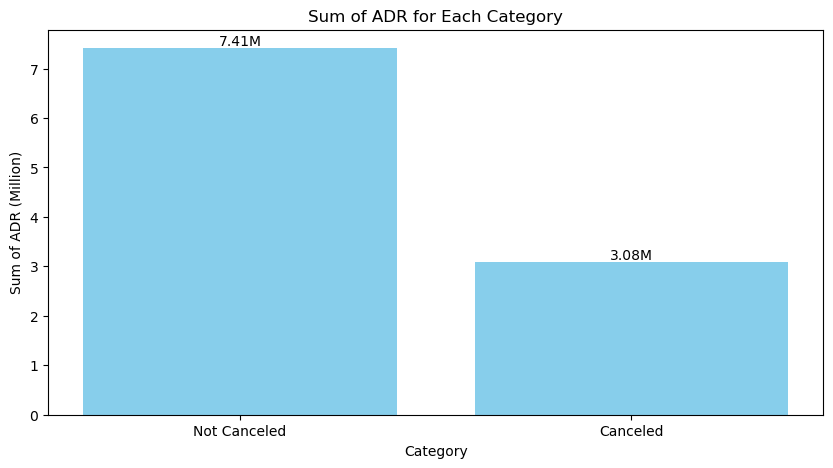

In [110]:
# Group by 'is_canceled' and calculate the sum of ADR for each group
adr_sum_grouped = df.groupby('is_canceled')['adr'].sum().reset_index()
adr_sum_grouped['is_canceled'] = adr_sum_grouped['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})

# Create a bar plot for the sum of ADR
plt.figure(figsize=(10, 5))
bars = plt.bar(adr_sum_grouped['is_canceled'], adr_sum_grouped['adr'] / 1000000, color='skyblue')
plt.title('Sum of ADR for Each Category')
plt.xlabel('Category')
plt.ylabel('Sum of ADR (Million)')

# Add data value on top of each bar
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}M', ha='center', va='bottom')

plt.show()

The total ADR for 'Not Canceled' bookings is higher than for 'Canceled' bookings. This might indicate that more revenue is lost due to cancellations.

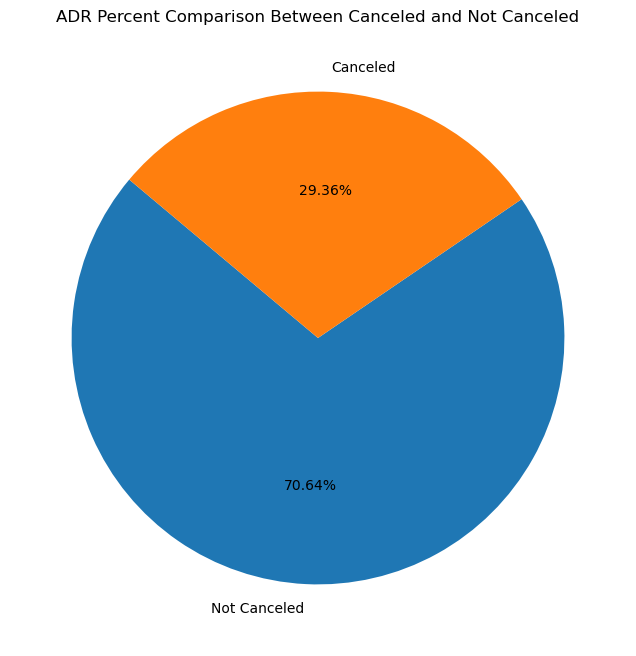

In [111]:
# Define the data for the pie chart
adr_sum_total = df['adr'].sum()
adr_sum_not_canceled = df.loc[df['is_canceled'] == 0, 'adr'].sum()
adr_sum_canceled = df.loc[df['is_canceled'] == 1, 'adr'].sum()

adr_percent_values = [adr_sum_not_canceled / adr_sum_total * 100, adr_sum_canceled / adr_sum_total * 100]
categories = ['Not Canceled', 'Canceled']

# Create a pie chart for the ADR percent comparison
plt.figure(figsize=(8, 8))
plt.pie(adr_percent_values, labels=categories, autopct='%1.2f%%', startangle=140)
plt.title('ADR Percent Comparison Between Canceled and Not Canceled')
plt.show()

The ADR for 'Not Canceled' bookings constitutes approximately 71% of the total ADR, while 'Canceled' bookings make up about 29%. This suggests that a significant amount of potential revenue is lost due to cancellations.

In [112]:
# Calculate the sum of ADR for not canceled and canceled bookings
adr_sum_not_canceled = df[df['is_canceled'] == 0]['adr'].sum()
adr_sum_canceled = df[df['is_canceled'] == 1]['adr'].sum()

# Simulate conversion of canceled bookings
adr_sum_canceled_converted_25 = adr_sum_not_canceled + adr_sum_canceled * 0.25
adr_sum_canceled_converted_50 = adr_sum_not_canceled + adr_sum_canceled * 0.5
adr_sum_canceled_converted_75 = adr_sum_not_canceled + adr_sum_canceled * 0.75

# Create a DataFrame to store these values
simulation_df = pd.DataFrame({
    'Scenario': ['Actual Not Canceled', 'Convert 25% of Canceled', 
                 'Convert 50% of Canceled', 'Convert 75% of Canceled'],
    'Sum ADR (in million)': [adr_sum_not_canceled / 1e6, adr_sum_canceled_converted_25 / 1e6,
                             adr_sum_canceled_converted_50 / 1e6, adr_sum_canceled_converted_75 / 1e6]})
    
simulation_df

,Scenario,Sum ADR (in million)
0,Actual Not Canceled,7.414852
1,Convert 25% of Canceled,8.185493
2,Convert 50% of Canceled,8.956135
3,Convert 75% of Canceled,9.726776


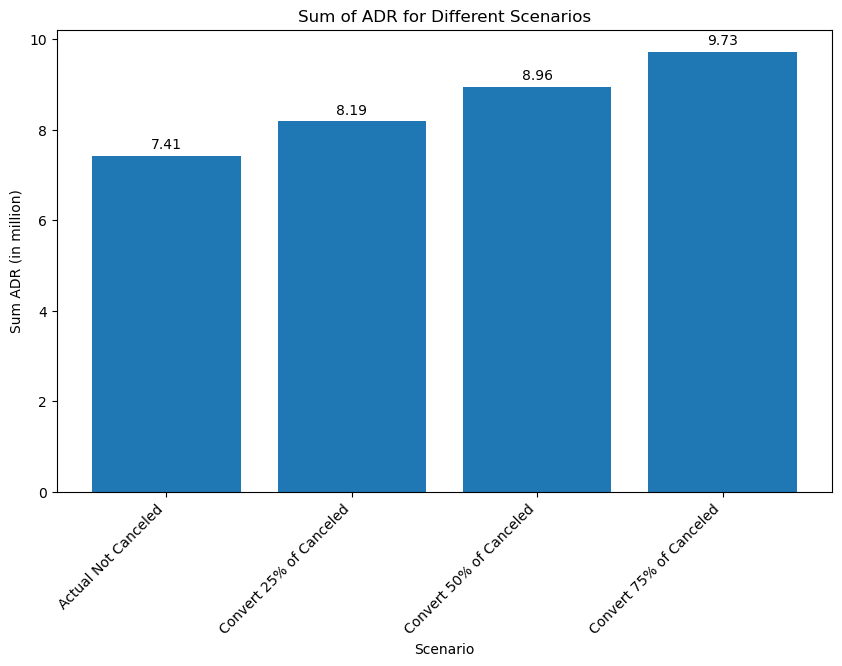

In [113]:
# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))
bars = plt.bar(simulation_df['Scenario'], simulation_df['Sum ADR (in million)'])
plt.title('Sum of ADR for Different Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Sum ADR (in million)')
plt.xticks(rotation=45, ha='right')

# Add data values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.show()

From the chart, you can clearly see the potential increase in the sum of ADR if a certain percentage of the canceled bookings were converted to not canceled. This can provide an estimate of the potential revenue increase if the hotel can reduce the cancellation rate.

As we can see, there is significant potential to increase revenue by reducing the cancellation rate. Converting even a quarter of the cancelled bookings could result in an increase in total ADR by about 1.16 million. The potential increase grows with the conversion rate, reaching about 2.32 million when 75% of cancelled bookings are converted.

1- Targeted Marketing for High Cancellation Countries:

As Portugal accounts for a large proportion of both total bookings and cancellations, it could be beneficial to focus on this market to understand the reasons behind the high cancellation rate. This could involve surveys or market research to identify any issues or concerns Portuguese customers might have, and then addressing those issues in your marketing and service offerings.

2- Reducing Lead Time:

The Chi-square test indicated a significant relationship between lead time and cancellation rate. Therefore, strategies to reduce lead time could help decrease cancellations. This could involve offering incentives for last-minute bookings or implementing a dynamic pricing model where prices decrease as the booking date approaches.

3- Reducing Unmatched customer requirements:

To minimize the difference between reserved and assigned rooms in the hotel industry and reduce cancellation rates, implement real-time inventory management and dynamic room allocation systems. Utilize automated room assignment tools, improve communication between departments, and provide transparent information to guests during the reservation process. Consider overbooking strategies based on data analysis and continuously train staff to efficiently handle room assignments, aiming for a seamless guest experience.

4- Investing in Cancellation Prevention:

The analysis of ADR for canceled bookings showed that reducing the cancellation rate could lead to a significant increase in revenue. This indicates that investing in cancellation prevention could be highly profitable. This could involve improving the booking process, enhancing customer service, or offering flexible cancellation policies to prevent customers from cancelling their bookings in the first place.

5- Offering Flexible Plans:

Offering more flexible booking options may decrease the likelihood of cancellations. This could include options such as free cancellation up to a certain number of days before the stay, or the option to reschedule the booking without additional fees.

6- Loyalty Programs:

Implementing a loyalty program could also help reduce cancellation rates. If customers feel valued and receive additional benefits from a loyalty program, they may be less likely to cancel their bookings.